In [1]:
import numpy
from scipy.linalg import solve

In [2]:
def generateMatrix(N, sigma):
    """Computes the matrix for the diffusion equation with Crank-Nicolson
       Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    N : int
        Number of discretization points
    sigma : float
            alpha*dt/dx^2
    
    Returns:
    -------
    A : 2D numpy array of float
        Matrix for diffusion equation
    """
    
    # Setup the diagonal
    d = 2*numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+2./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [3]:
def generateRHS(T, sigma):
    """Computes right-hand-side of linear system for diffusion equation with backward Euler
    
    Parameters:
    ----------
    T : array of float
        Temperature at current time step
    sigma : float
            alpha*dt/dx^2
    
    Returns:
    -------
    b : array of float
        Right-hand-side of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*2*(1./sigma-1) + T[:-2] + T[2:]
    
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [4]:
def CrankNicolson(T, A, nt, sigma):
    """Advances diffusion equation in time with Crank-Nicolson
    
    Parameters:
    ----------
    T : array of float
        initial temperature profile
    A : 2D array of float
        Matrix with discretized diffusion equation
    nt : int
         number of time steps
    sigma : float
            alpha*dt/dx^2
    
    Returns:
    -------
    T : array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]
    
    return T

In [5]:
L = 1
nx = 21
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

sigma = 0.5
dt = sigma * dx*dx/alpha
nt = 10

A = generateMatrix(nx, sigma)

In [6]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

In [7]:
T = CrankNicolson(Ti.copy(), A, nt, sigma)

In [8]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

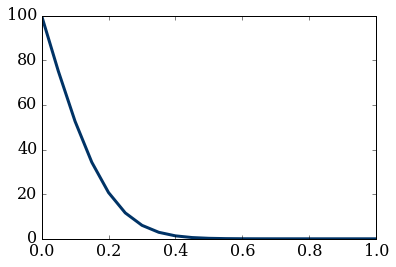

In [9]:
x = numpy.linspace(0,L,nx)

pyplot.plot(x, T, color='#003366', ls='-', lw=3);

In [10]:
from math import pi
def T_analytical(x, t, n_max, alpha, L):
    """Computes the exact solution for 1D diffusion with T=100 at x=0 and dT/dx=0 at x=L
    
    Parameters:
    ----------
    x : array of float
        Spatial position
    t : float
        Evaluation time
    n_max : int
            Number of terms to evaluate expression
    alpha : float
            diffusion coefficient
    L : float
        Size of rod
    
    Returns:
    -------
    T : array of float
        Temperature at each location x
    """
    
    T = 100
    
    for n in range(1,n_max+1):
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi) * numpy.sin(k*x) * numpy.exp(-alpha*k*k*t)
        
        T -= summation
    
    return T

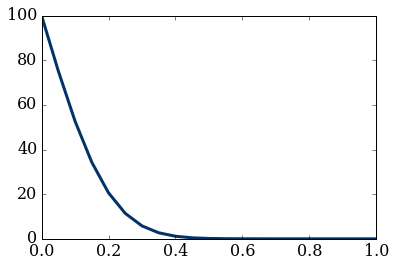

In [11]:
T_exact = T_analytical(x, dt*nt, 100, alpha, L)
pyplot.plot(x, T_exact, color='#003366', ls='-', lw=3);

In [12]:
T1 = T_analytical(x, .2, 100, alpha, L)
T2 = T_analytical(x, .2, 200, alpha, L)
numpy.sqrt(numpy.sum((T1-T2)**2)/numpy.sum(T2**2))

6.9279171182600926e-13